In [1]:
import pandas as pd

Loading dataset

In [2]:
df_train = pd.read_feather("../../../data/processed/CLTP_train_set.feather")

In [3]:
X_train = df_train.drop(["CLTP"], axis=1)
y_train = df_train["CLTP"]
del df_train

## Training

Dummify 

In [4]:
X_train = X_train.drop(["DATECO_RAZON_SOCIAL_EMPLEADOR","FECHA_NACIMIENTO","time_window"], axis=1)

In [5]:
X_train = pd.get_dummies(X_train)

In [6]:
X_train = X_train.fillna(-999)

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15, n_jobs=-1, verbose=2)
rf.fit(X_train, y_train)  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 15building tree 2 of 15building tree 3 of 15building tree 4 of 15building tree 5 of 15

building tree 6 of 15
building tree 7 of 15


building tree 8 of 15

building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.8min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

### Feature importance

In [ ]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns, columns=['importance']
                                   ).sort_values('importance', ascending=False).iloc[0:20].plot.bar()

### Validation Dataset

In [9]:
df_val = pd.read_feather("../../../data/processed/CLTP_validation_set.feather")

### Model metrics

In [10]:
from sklearn.metrics import mean_squared_error,roc_auc_score,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

In [11]:
X_val = df_val.drop(["CLTP"], axis=1)
y_val = df_val["CLTP"]
del df_val

In [12]:
X_val = X_val.drop(["DATECO_RAZON_SOCIAL_EMPLEADOR","FECHA_NACIMIENTO","time_window"], axis=1)
X_val = pd.get_dummies(X_val)
X_val = X_val.fillna(-999)

In [13]:
for col in [col for col in X_train.columns if col not in X_val.columns]:
    X_val[col] = -999

In [14]:
X_val = X_val.drop([col for col in X_val.columns if col not in X_train.columns], axis=1)

In [15]:
predictions = rf.predict(X_val)
predictions = ([round(y) for y in predictions])
pd.Series(predictions).value_counts()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   8 out of  15 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.4s finished


0.0    156386
1.0    114969
2.0     30247
3.0      5046
4.0      1031
5.0       258
6.0         5
dtype: int64

In [16]:
import seaborn as sns

In [17]:
cmap = sns.color_palette("coolwarm", 7)

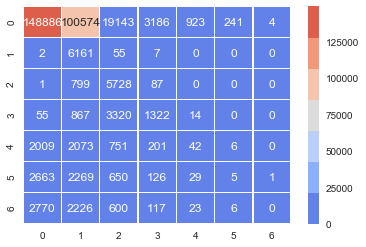

In [18]:
sns.set(font_scale=1)
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt="d", linewidths=.5, cmap=cmap) 

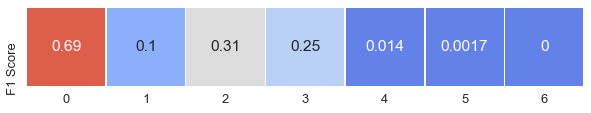

In [19]:
data = pd.DataFrame(columns=range(7), data=[f1_score(y_val, predictions, average=None)])
data.index = ["F1 Score"]
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
sns.set(font_scale=1.3)
sns.heatmap(data, annot=True, linewidths=.5, cmap=cmap, square=True, cbar=False)

In [21]:
pd.crosstab(y_val, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

AssertionError: arrays and names must have the same length

#### Dumping model

In [31]:
import pickle

In [32]:
with open('../../src/models/Primer modelo basico - dummies.md', 'wb') as file:
    pickle.dump(rf, file, pickle.HIGHEST_PROTOCOL)

FileNotFoundError: [Errno 2] No such file or directory: '../../src/models/Primer modelo basico - dummies.md'